In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


K-Means Clustering based on Geographic Data.
Geographic Data (Latitude and Longitude) is taken as input and ids and cateogory of all nearby places is displayed.

NUMBER OF TOTAL RECOMMENDATIONS FOUND: 165


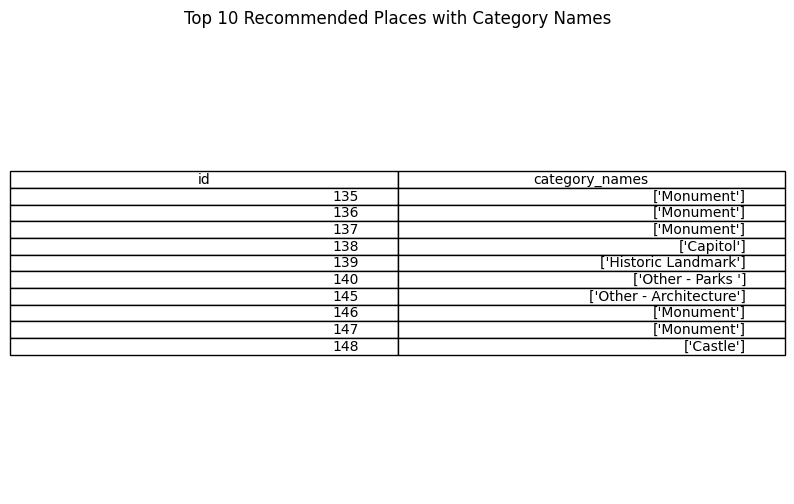

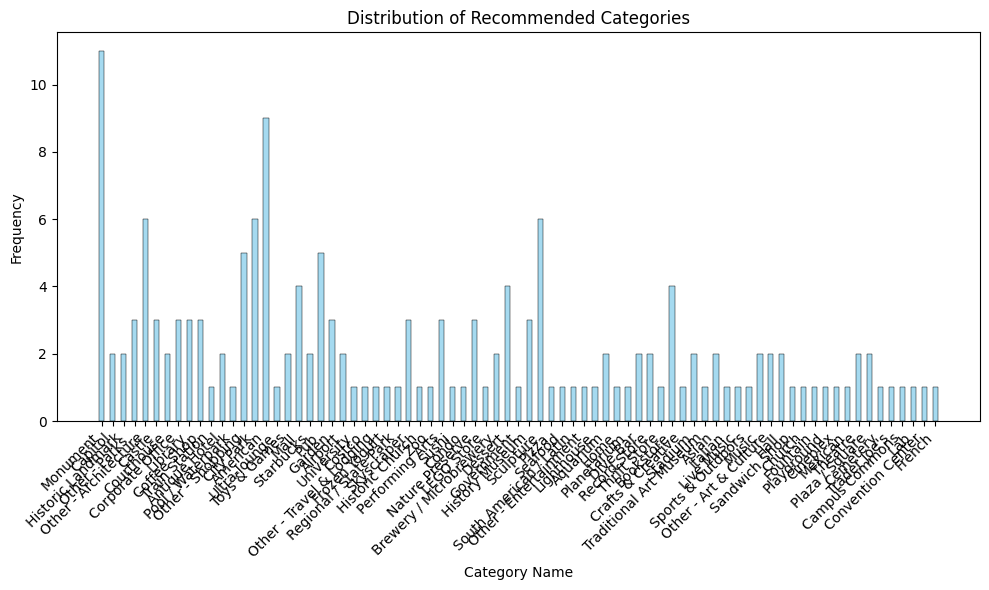

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

file_path_subset1 = '/content/drive/My Drive/spots_subset1.csv'
places = pd.read_csv(file_path_subset1)
X = places[['lat', 'lng']].values

# Apply K-means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
clusters = kmeans.fit_predict(X)

places['cluster'] = clusters

# User profiling (example)(100,-90)(250,-300)
user_profile = {'lat': 100, 'lng': -90}

user_cluster = kmeans.predict([[user_profile['lat'], user_profile['lng']]])

recommended_places = places[places['cluster'] == user_cluster[0]].copy()

total_recommendations = len(recommended_places)

recommended_places['category_names'] = recommended_places['spot_categories'].apply(lambda x: [category['name'] for category in eval(x)])

top_10_recommendations = recommended_places[['id', 'category_names']].head(10)

print("NUMBER OF TOTAL RECOMMENDATIONS FOUND:", total_recommendations)
plt.figure(figsize=(10, 6))
plt.table(cellText=top_10_recommendations.values, colLabels=top_10_recommendations.columns, loc='center')
plt.axis('off')
plt.title('Top 10 Recommended Places with Category Names')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(recommended_places['category_names'].explode(), color='skyblue', shrink=0.5)
plt.title('Distribution of Recommended Categories')
plt.xlabel('Category Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

